In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\hp\Downloads\Train_awoL0xl.csv")
test = pd.read_csv(r"C:\Users\hp\Downloads\Test_QQKW4dv.csv")
ss = pd.read_csv(r"C:\Users\hp\Downloads\SampleSubmission_ZxsCq0O.csv")

In [3]:
df = pd.concat([train,test], axis = 0)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

for attr in ['year', 'month', 'day', 'week','dayofweek']:
    df[attr] = getattr(df['Date'].dt, attr)

In [5]:
train, test = df[:train.shape[0]].reset_index(drop = 'true') , df[train.shape[0]:].reset_index(drop = 'true')


In [6]:
features = ['stock','holiday','unpredictability_score', 'year', 'month', 'day', 'week', 'dayofweek']

target_col = ['Close']

from sklearn.model_selection import train_test_split

trn ,val = train_test_split(train, test_size = 0.2, random_state = 1)


In [7]:
x_trn , x_val = trn[features], val[features]


In [8]:
y_trn, y_val = trn[target_col] , val[target_col]


In [9]:
x_test = test[features]


In [10]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

dt_fit = dt.fit(x_trn, y_trn)

dt_pred = dt_fit.predict(x_test)


In [11]:
a1 = ss.drop('Close',axis = 1)

Close = pd.DataFrame(dt_pred, columns=['Close'])

dt1 = pd.concat([a1,Close],axis = 1)

dt1

dt1.to_csv("F:/dt1.csv")


In [12]:
from sklearn.model_selection import RandomizedSearchCV

hyperpara_cmbination = {
        'max_depth': [2,3,4,6,5,8,10],
         'min_samples_split':[2,10,20,30,40],
        'max_leaf_nodes': [2,4,8,16,32,64.128]
}

dlf = RandomizedSearchCV(dt,hyperpara_cmbination,random_state = 1, n_iter = 40)

dlf1 = dlf.fit(x_trn, y_trn)

dlf.best_estimator_


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 282, in fit
    "%r" % max_leaf_nodes)
ValueError: max_leaf_nodes must be integral number but was 64.128

  FitFailedWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  Fil

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=32, min_samples_split=40,
                      random_state=0)

In [13]:
rf = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=32, min_samples_split=40,
                      random_state=0)

rf1 = rf.fit(x_trn, y_trn)

rf1_pred = rf1.predict(x_test)

rf1_pred


array([ 86.93724501,  86.93724501,  86.93724501, ..., 125.48694713,
       125.48694713, 125.48694713])

In [14]:
rf2 = rf1.predict(x_val)

In [15]:
(mean_squared_error(rf2,y_val))**0.5

NameError: name 'mean_squared_error' is not defined

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=1, n_jobs=-1)

rfr_fit = rfr.fit(x_trn, y_trn)

rfr_pred = rfr_fit.predict(x_test)

rfr_pred


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([118.009826, 118.483754, 118.30716 , ..., 130.93735 , 136.5015  ,
       136.511871])

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=1)

lgbm_fit = lgbm.fit(x_trn, y_trn)

lgbm_pred = lgbm_fit.predict(x_test)

lgbm_pred



array([109.22980225, 109.22980225, 109.22980225, ..., 127.61824012,
       126.03946108, 126.03946108])

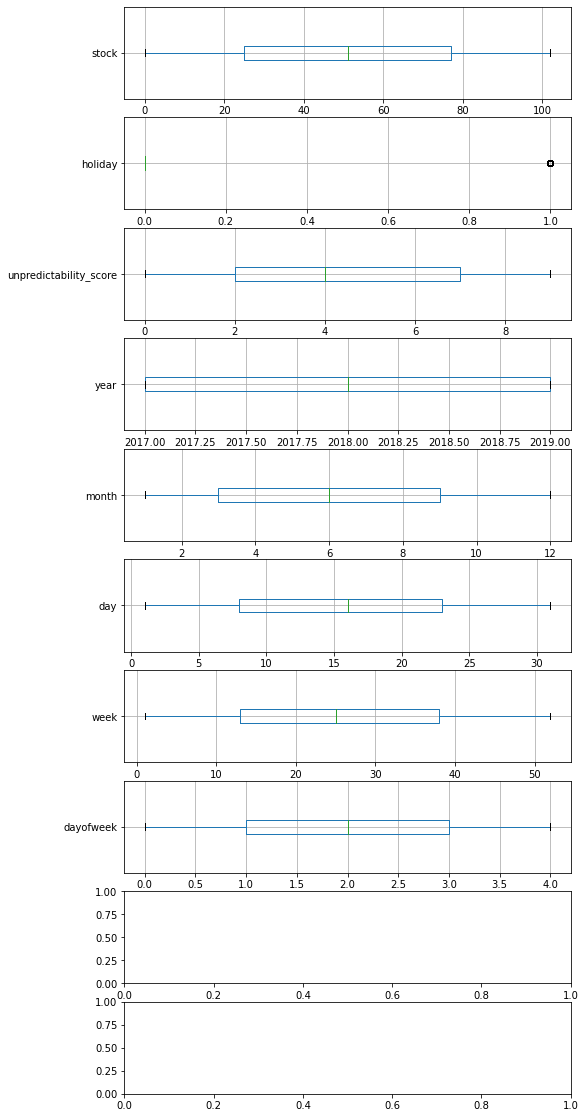

In [19]:
fig, axes = plt.subplots(10, 1, figsize=(8, 20))
for i, c in enumerate(features):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)


In [20]:
train[features].corr()

,stock,holiday,unpredictability_score,year,month,day,week,dayofweek
stock,1.000000e+00,-2.219034e-19,2.606291e-01,-4.279394e-18,-3.717484e-19,0.000000e+00,-1.015497e-19,2.324524e-21
holiday,-2.219034e-19,1.000000e+00,-1.561849e-17,2.251795e-03,3.142239e-02,-7.726541e-02,2.770277e-02,-1.431557e-01
unpredictability_score,2.606291e-01,-1.561849e-17,1.000000e+00,-8.388003e-16,8.244564e-17,1.086791e-17,-2.539170e-17,-4.285011e-18
year,-4.279394e-18,2.251795e-03,-8.388003e-16,1.000000e+00,-1.137769e-01,-1.901089e-03,-1.061384e-01,-3.450687e-03
month,-3.717484e-19,3.142239e-02,8.244564e-17,-1.137769e-01,1.000000e+00,1.443215e-02,9.877188e-01,-1.043338e-02
day,0.000000e+00,-7.726541e-02,1.086791e-17,-1.901089e-03,1.443215e-02,1.000000e+00,9.264130e-02,-8.161989e-03
week,-1.015497e-19,2.770277e-02,-2.539170e-17,-1.061384e-01,9.877188e-01,9.264130e-02,1.000000e+00,-1.755670e-02
dayofweek,2.324524e-21,-1.431557e-01,-4.285011e-18,-3.450687e-03,-1.043338e-02,-8.161989e-03,-1.755670e-02,1.000000e+00


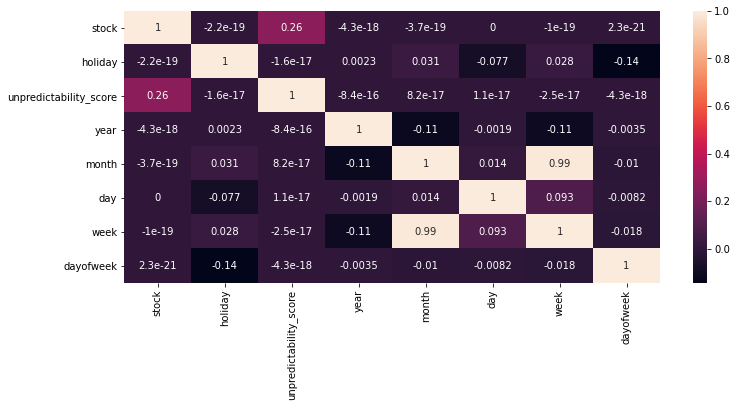

In [21]:
plt.figure(figsize=(12,5))
sns.heatmap(train[features].corr(),annot=True)

In [22]:
from sklearn.model_selection import KFold

In [23]:
from sklearn.model_selection import StratifiedKFold

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
score = cross_val_score(rfr,train[features],train[target_col],cv=10)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

In [26]:
score

array([-0.75250291, -3.62048209, -0.25064993, -0.59804231, -0.93325128,
       -1.19589411,  0.37550486, -1.17955311,  0.30916687,  0.11266865])

In [27]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred):
  return  np.sqrt(mean_squared_error(y_true, y_pred))

In [28]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[target_col]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(round(train['Close']), 10, labels = False, duplicates='drop')

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

   

    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = av_metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = av_metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

In [29]:
clf = RandomForestRegressor()
        

dt_oofs, dt_preds = run_clf_kfold(clf, train, test, features)


------------- Fold 1 -------------


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



AV metric score for validation set is 39.18629201813525

------------- Fold 2 -------------


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



AV metric score for validation set is 28.561736651568157

------------- Fold 3 -------------


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



AV metric score for validation set is 20.776045950528403

------------- Fold 4 -------------


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



AV metric score for validation set is 25.779791565267445

------------- Fold 5 -------------


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



AV metric score for validation set is 34.28063936426424


AV metric for oofs is 30.406332214446127


In [30]:
stratified_target = pd.qcut(round(train['Close']), 15, labels = False, duplicates='drop')


In [31]:
train['Close']

0         82.8101
1         82.9690
2         82.8578
3         82.7385
4         81.8641
           ...   
73434    131.0068
73435    131.8185
73436    132.0440
73437    131.6381
73438    130.7362
Name: Close, Length: 73439, dtype: float64

In [32]:
round(train['Close'])

0         83.0
1         83.0
2         83.0
3         83.0
4         82.0
         ...  
73434    131.0
73435    132.0
73436    132.0
73437    132.0
73438    131.0
Name: Close, Length: 73439, dtype: float64

In [33]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
}

clf = RandomizedSearchCV(DecisionTreeRegressor(),
                         hyperparam_combs,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

search = clf.fit(train[features], train[target_col])

search.best_params_

{'min_samples_split': 20,
 'max_leaf_nodes': 8,
 'max_features': 0.6,
 'max_depth': 12}

In [34]:
dtrr = DecisionTreeRegressor(min_samples_split=2, max_leaf_nodes=64,max_features=0.6,max_depth=4)

In [35]:
dtrr_fit = dtrr.fit(train[features],train[target_col])

In [36]:
dtrr_pred = dtrr_fit.predict(test[features])

In [37]:
dtrr_pred

array([89.34064946, 89.34064946, 89.34064946, ..., 94.8636456 ,
       94.8636456 , 94.8636456 ])

In [38]:
dt

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'n_estimators' : [100,200,300,400,500],
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
}

clf = RandomizedSearchCV(RandomForestRegressor(),
                         hyperparam_combs,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

search = clf.fit(train[features], train[target_col])

search.best_params_

In [ ]:
rrr = RandomForestRegressor(n_estimators=100, min_samples_split=20,
                            max_leaf_nodes=64, max_features=0.6,max_depth=6)

In [ ]:
print(rrr)

In [ ]:
print(rfr)

In [ ]:
rrr_fit  = rrr.fit(train[features],train[target_col])

In [ ]:
rrr_fit.predict(x_test)